# Euro daily exchange rates between 1999 and 2021 



In [5]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
exchange_rates.info()


  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2024-09-27                1.618           1.9558            6.0668   
1   2024-09-26               1.6217           1.9558            6.0372   
2   2024-09-25               1.6276           1.9558            6.1104   
3   2024-09-24               1.6237           1.9558             6.137   
4   2024-09-23               1.6274           1.9558            6.1976   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5036          0.942                    7.823              NaN   
1             1.5025         0.9452                   7.8213              NaN   
2             1.5044         0.9495                   7.8692              NaN   
3             1.5033         0.9439                    7.829              NaN   
4             1.5065         0.9448                   7.8438              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [10]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

euro_to_dollar = exchange_rates[['US_dollar', 'Time']]
euro_to_dollar.value_counts('US_dollar')
euro_to_dollar = euro_to_dollar[~euro_to_dollar['US_dollar'].str.contains('-')]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


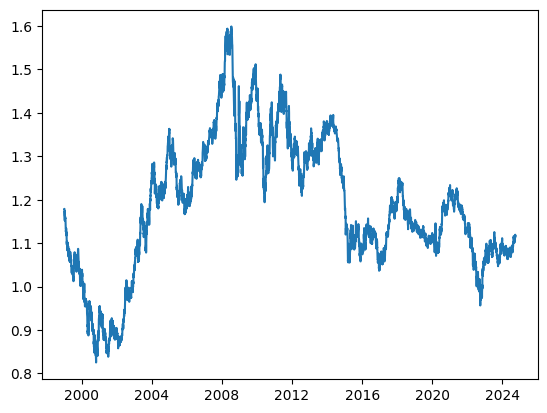

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()
#alculate the rolling means for the US_dollar column using a moving window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

the idea is about show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021))

In [30]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bosh_obama_trump.copy().loc[euro_to_dollar['Time'].dt.year <2009]
obama = bosh_obama_trump.copy().loc[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year <2017)]
trump = bosh_obama_trump.copy().loc[(euro_to_dollar['Time'].dt.year >=2017) & (euro_to_dollar['Time'].dt.year <2021)]



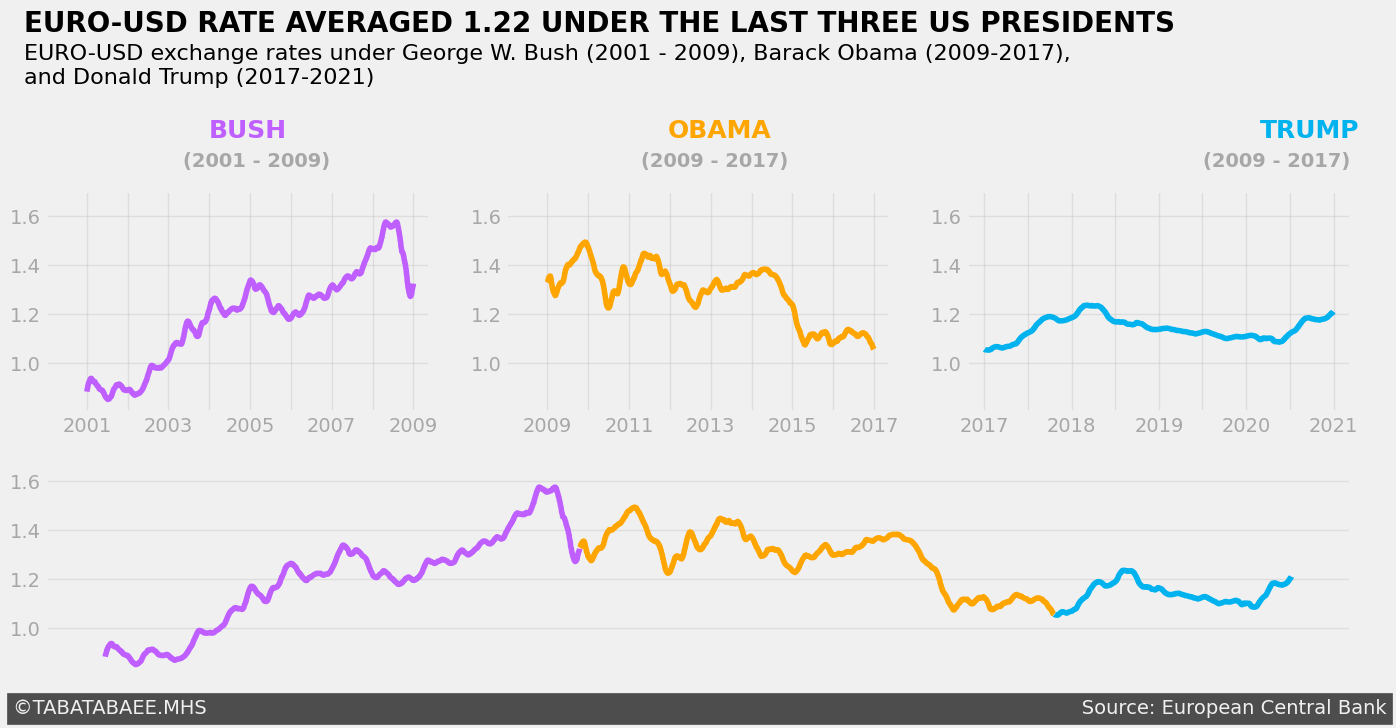

In [44]:
#adding style
import matplotlib.style as style
style.use('fivethirtyeight')
#subplots


plt.figure(figsize=(15,6), dpi=100)
ax1= plt.subplot(2,3,1)
ax2= plt.subplot(2,3,2)
ax3= plt.subplot(2,3,3)
ax4= plt.subplot(2,1,2)
axes= [ax1, ax2, ax3, ax4]

#changes for all
for ax in axes :
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha = 0.3)
    ax.grid(alpha= 0.5)

#bush_plot ax1
ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticks([10957, 11323, 11688, 12053, 12418, 12784, 13149, 13514, 13879, 14245])
ax1.set_xticklabels(['','2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(12418, 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(12180, 1.8, '(2001 - 2009)', weight='bold', alpha=0.3)

#obama_plot ax2
ax2.plot(obama['Time'], obama['rolling_mean'], color = '#ffa500')
ax2.set_xticks([13879, 14245, 14610, 14975, 15340, 15706, 16071, 16436, 16801, 17167])
ax2.set_xticklabels(['','2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(15318, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(15080, 1.8, '(2009 - 2017)', weight='bold', alpha=0.3)

#trump_plot ax3
ax3.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')
ax3.set_xticks([17167, 17348, 17532, 17713, 17897, 18078, 18262, 18444, 18628])
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
ax3.text(18318, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(18080, 1.8, '(2009 - 2017)', weight='bold', alpha=0.3)

#all_plots ax4
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'], color = '#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color = '#00B2EE')
ax4.grid(alpha= 0.5)
ax4.set_xticks([])

#adding title and subtitles
ax1.text(10757, 2.35, 'EURO-USD RATE AVERAGED 1.22 UNDER THE LAST THREE US PRESIDENTS', fontsize=20, weight='bold')
ax1.text(10757, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

#the signiture
ax4.text(10757, 0.65, '©TABATABAEE.MHS' + ' '*140 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()
